<a href="https://colab.research.google.com/github/PINKIREKHA/WALMART_BUSINESSCASE/blob/main/Walmart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy.stats import binom


In [ ]:
df = pd.read_csv("Walmart.txt")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,8370.0
1,1000001,P00248942,F,0-17,10.0,A,2,0.0,1.0,15200.0
2,1000001,P00087842,F,0-17,10.0,A,2,0.0,12.0,1422.0
3,1000001,P00085442,F,0-17,10.0,A,2,0.0,12.0,1057.0
4,1000002,P00285442,M,55+,16.0,C,4+,0.0,8.0,7969.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24452 entries, 0 to 24451
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     24452 non-null  int64  
 1   Product_ID                  24452 non-null  object 
 2   Gender                      24452 non-null  object 
 3   Age                         24452 non-null  object 
 4   Occupation                  24451 non-null  float64
 5   City_Category               24451 non-null  object 
 6   Stay_In_Current_City_Years  24451 non-null  object 
 7   Marital_Status              24451 non-null  float64
 8   Product_Category            24451 non-null  float64
 9   Purchase                    24451 non-null  float64
dtypes: float64(4), int64(1), object(5)
memory usage: 1.9+ MB


In [ ]:
df.shape

(244594, 10)

to check null values

In [ ]:
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 1
Stay_In_Current_City_Years    1
Marital_Status                1
Product_Category              1
Purchase                      1
dtype: int64

In [ ]:
df["Purchase"].fillna(df["Purchase"].mean())  #filling the nan purchase value with the mean
df.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,8370.0
1,1000001,P00248942,F,0-17,10.0,A,2,0.0,1.0,15200.0
2,1000001,P00087842,F,0-17,10.0,A,2,0.0,12.0,1422.0
3,1000001,P00085442,F,0-17,10.0,A,2,0.0,12.0,1057.0
4,1000002,P00285442,M,55+,16.0,C,4+,0.0,8.0,7969.0
5,1000003,P00193542,M,26-35,15.0,A,3,0.0,1.0,15227.0
6,1000004,P00184942,M,46-50,7.0,B,2,1.0,1.0,19215.0
7,1000004,P00346142,M,46-50,7.0,B,2,1.0,1.0,15854.0
8,1000004,P0097242,M,46-50,7.0,B,2,1.0,1.0,15686.0
9,1000005,P00274942,M,26-35,20.0,A,1,1.0,8.0,7871.0


In [ ]:
df.describe()
# there is a huge difference in 50% and mean it means there can be outliers

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,2.445200e+04,24451.000000,24451.000000,24451.000000,24451.000000
mean,1.001899e+06,8.237618,0.401620,5.289804,9252.884177
std,1.098962e+03,6.523932,0.490236,3.700265,4935.893551
min,1.000001e+06,0.000000,0.000000,1.000000,186.000000
25%,1.000997e+06,3.000000,0.000000,1.000000,5844.000000
50%,1.001841e+06,7.000000,0.000000,5.000000,8048.000000
75%,1.002890e+06,14.000000,1.000000,8.000000,12006.500000
max,1.003778e+06,20.000000,1.000000,18.000000,23958.000000


To check outliers

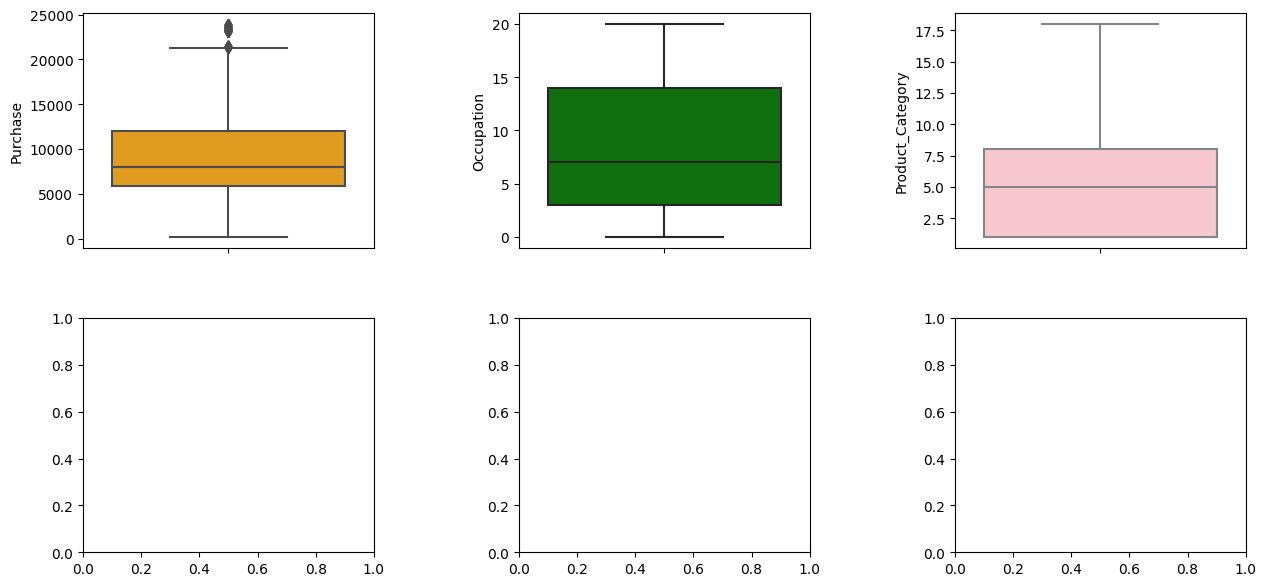

In [ ]:
fig,axis = plt.subplots(nrows = 2, ncols = 3, figsize =(15,7))
sns.boxplot(data = df , y = "Purchase" ,ax = axis[0,0] , color = "orange")
sns.boxplot(data = df , y = "Occupation" , ax = axis[0,1] , color = "green")
sns.boxplot(data = df , y = "Product_Category" , ax = axis[0,2] , color = "pink")

fig.subplots_adjust(hspace=0.3, wspace=0.5)

Do some data exploration steps like:
Tracking the amount spent per transaction of all the 50 million female customers, and all the 50 million male customers, calculate the average, and conclude the results.

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0.0,3.0,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0.0,1.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0.0,12.0,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0.0,12.0,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0.0,8.0,7969.0


<Axes: xlabel='Marital_Status', ylabel='count'>

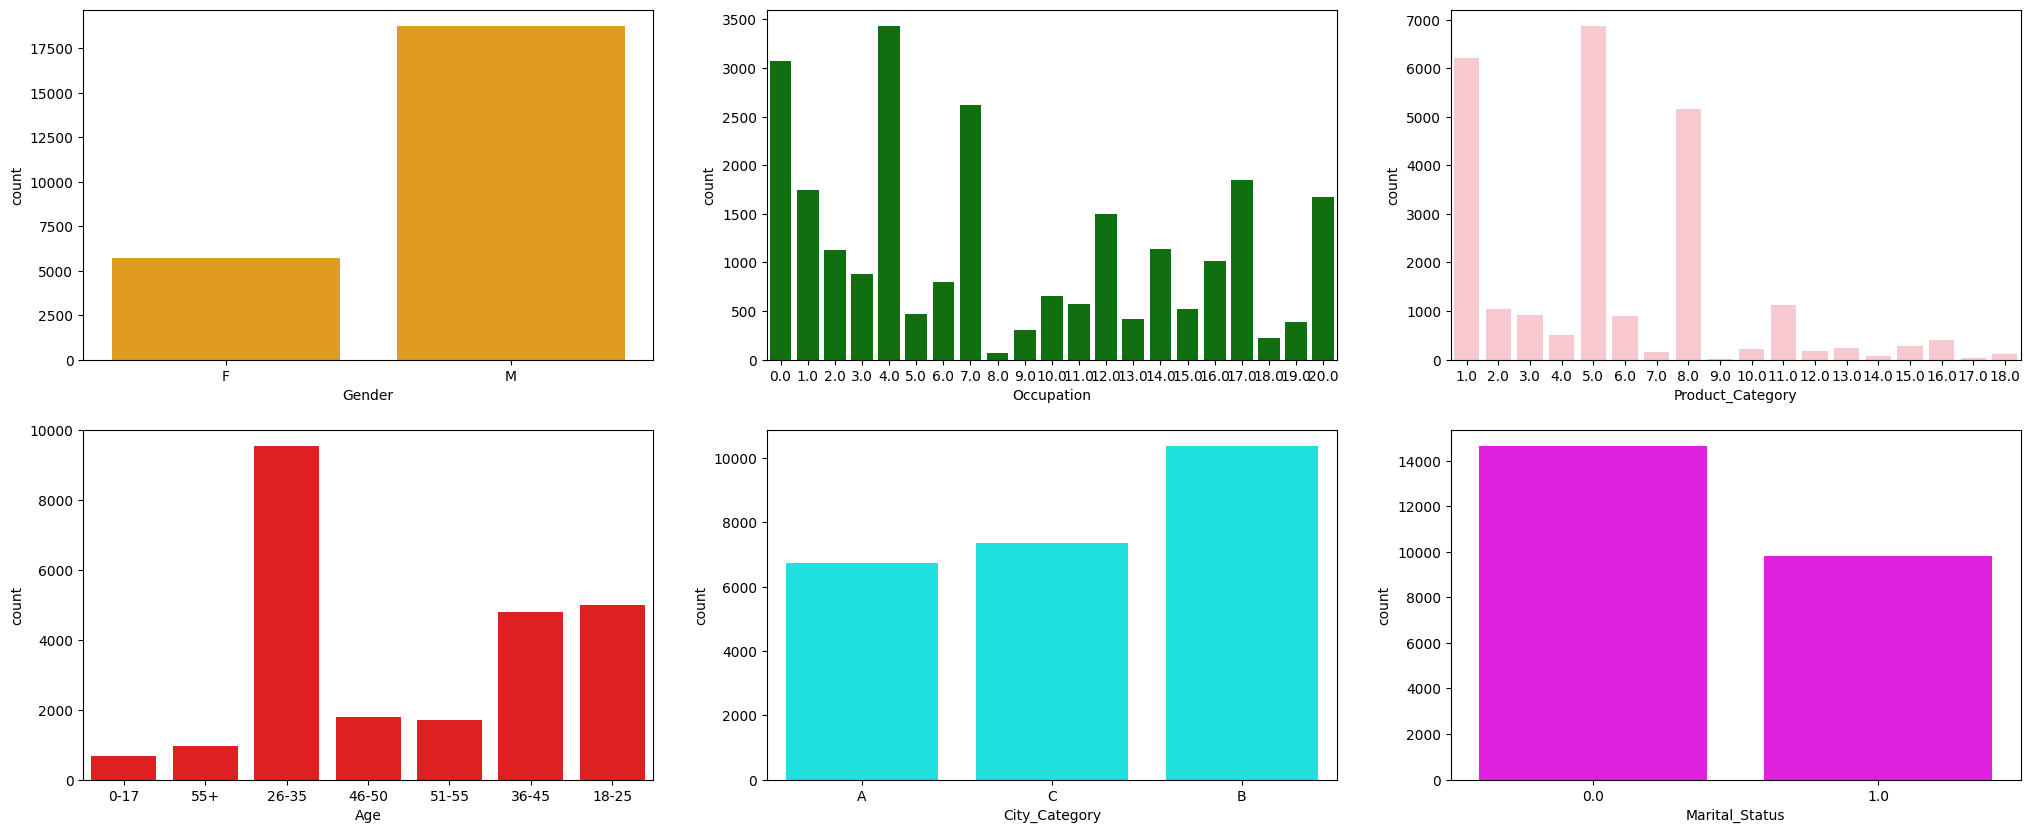

In [ ]:
fig,axis = plt.subplots(nrows = 2, ncols = 3, figsize =(25,10))
sns.countplot(data = df , x = "Gender" ,ax = axis[0,0] , color = "orange")
sns.countplot(data = df , x = "Occupation" , ax = axis[0,1] , color = "green")
sns.countplot(data = df , x = "Product_Category" , ax = axis[0,2] , color = "pink")
sns.countplot(data = df , x = "Age" , ax = axis[1,0] , color = "red")
sns.countplot(data = df , x = "City_Category" , ax = axis[1,1] , color = "aqua")
sns.countplot(data = df , x = "Marital_Status" , ax = axis[1,2] , color = "magenta")


Bivariate analysis

<Axes: xlabel='Marital_Status', ylabel='Purchase'>

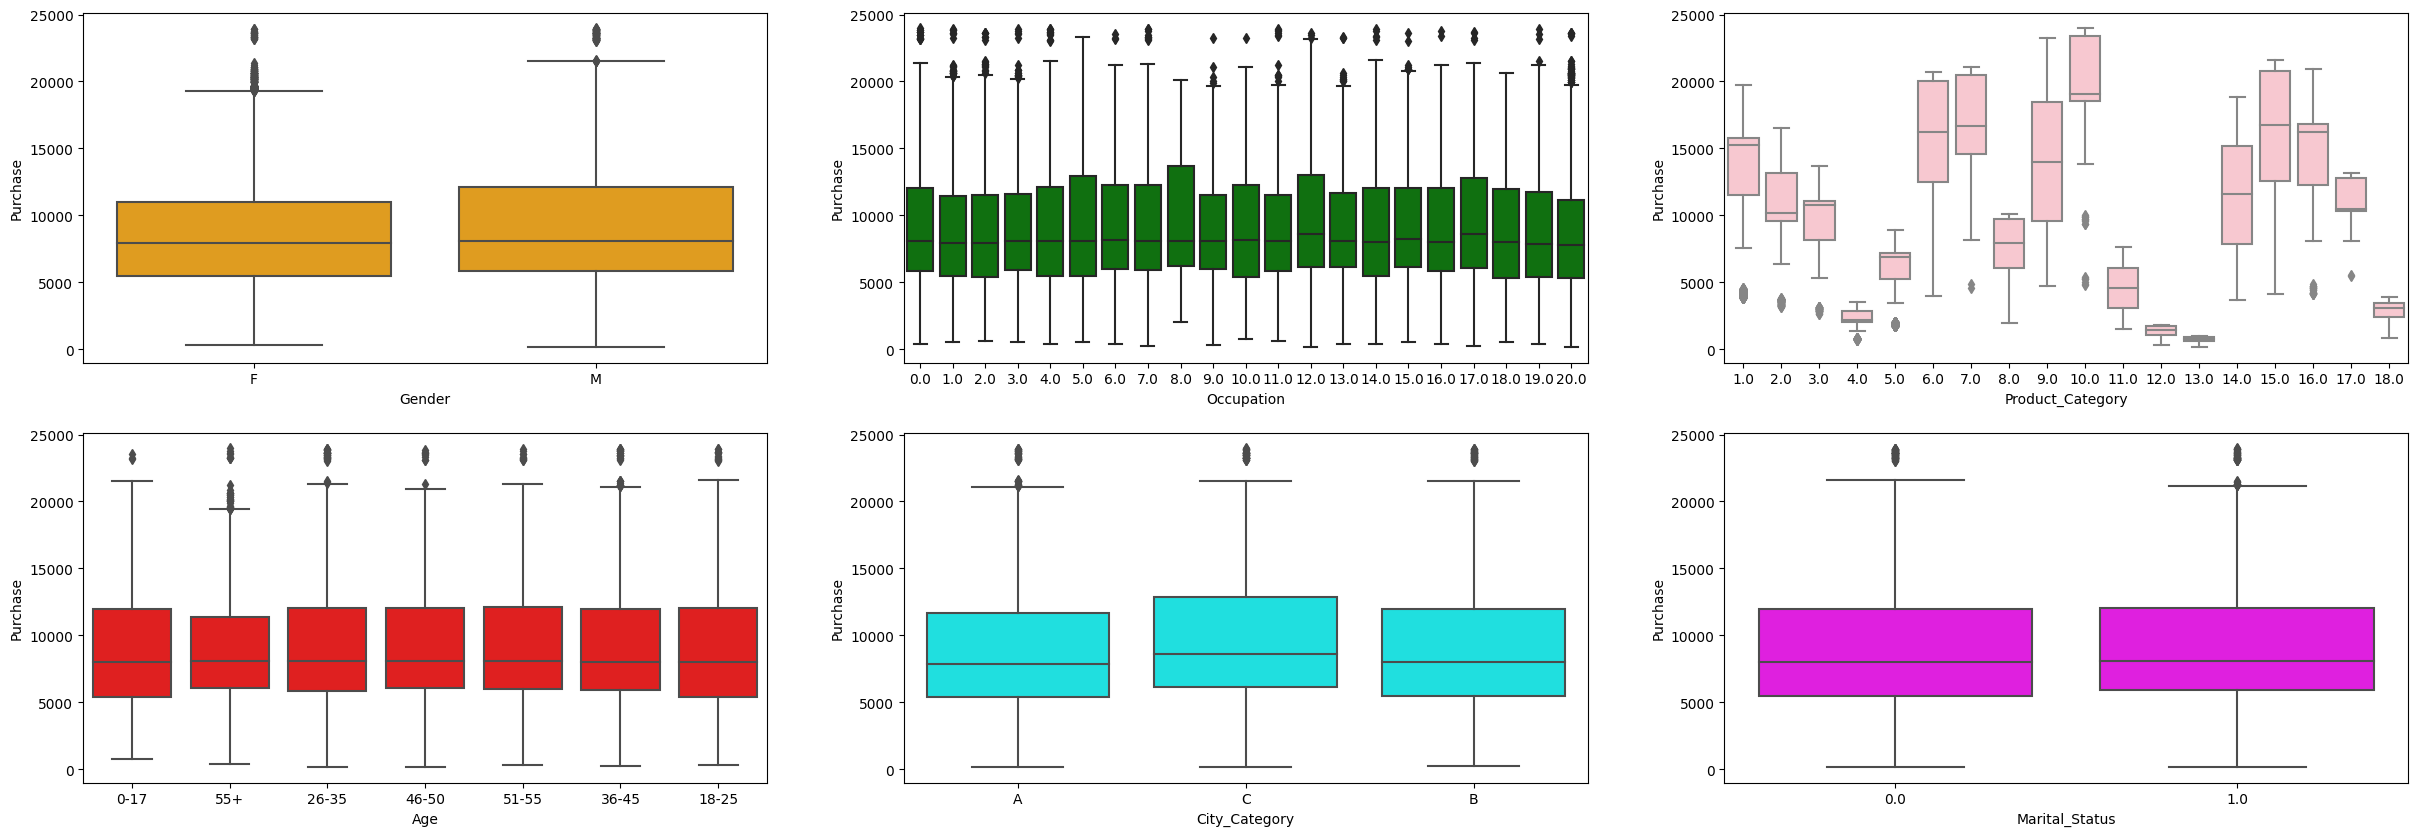

In [ ]:
fig,axis = plt.subplots(nrows = 2, ncols = 3, figsize =(30,10))
sns.boxplot(data = df , x = "Gender" ,y = "Purchase",ax = axis[0,0] , color = "orange")
sns.boxplot(data = df , x = "Occupation" , y = "Purchase",ax = axis[0,1] , color = "green")
sns.boxplot(data = df , x = "Product_Category" , y = "Purchase",ax = axis[0,2] , color = "pink")
sns.boxplot(data = df , x = "Age" , y = "Purchase",ax = axis[1,0] , color = "red")
sns.boxplot(data = df , x = "City_Category" , y = "Purchase",ax = axis[1,1] , color = "aqua")
sns.boxplot(data = df , x = "Marital_Status" , y = "Purchase",ax = axis[1,2] , color = "magenta")

TO FIND THE AVERAGE PURCHASE MADE BY FEMALES AND MALES

In [ ]:
df3 = df.loc[df["Gender"]=="F"]

result = df3["Purchase"].mean()

  #average of females
print("average purchase by females" , result)

average purchase by females 8732.438581163726


In [ ]:
df4 = df.loc[df["Gender"]=="M"]
result1 = df4["Purchase"].mean()
print("average purchase by males" , result1)


average purchase by males 9411.924658265698


<Axes: xlabel='Gender', ylabel='Purchase'>

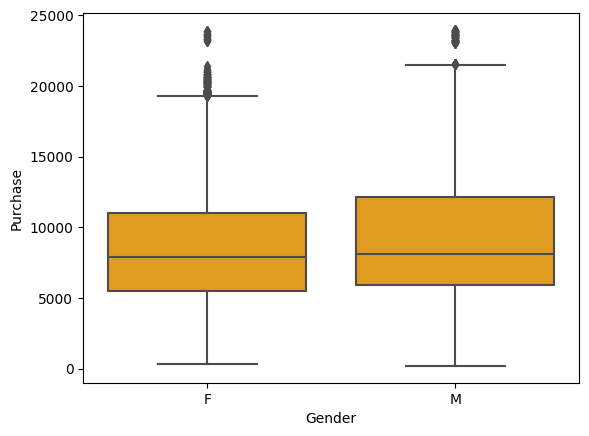

In [ ]:
sns.boxplot(data = df , x = "Gender" ,y = "Purchase" , color = "orange")

SAMPLE DISTRIBUTION OF PURCHASE GENDER WISE

All average values of samples for female customers : [10241.26923076923, 7761.888888888889, 7615.25, 9338.0, 7508.826086956522, 8486.88, 9312.407407407407, 11643.21052631579, 9184.65, 8414.8125, 7721.736842105263, 8817.208333333334, 10570.692307692309, 9419.0, 8481.076923076924, 9742.033333333333, 8944.67857142857, 6971.571428571428, 8915.095238095239, 9099.263157894737, 9386.038461538461, 8795.23076923077, 7690.608695652174, 8599.961538461539, 8733.851851851852, 6417.894736842105, 9777.172413793103, 9357.464285714286, 9108.884615384615, 10773.92, 6628.36, 8085.470588235294, 7389.103448275862, 7305.9375, 8469.67857142857, 9454.8, 8849.142857142857, 7931.952380952381, 10563.761904761905, 7872.321428571428, 9109.625, 7557.0, 9903.0, 7969.413793103448, 7176.888888888889, 8218.57142857143, 8042.038461538462, 8503.0, 9465.4, 8537.458333333334, 9046.82142857143, 8603.9, 8856.52, 8575.863636363636, 7798.285714285715, 9117.636363636364, 7656.620689655172, 7186.625, 8181.5625, 9402.576923076924

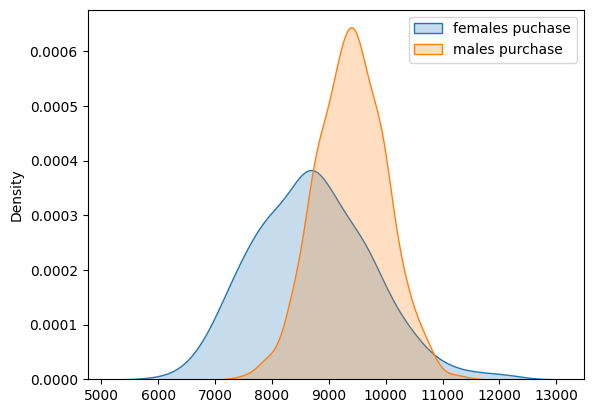

In [ ]:
#  to find mean of random samples
l = []
for i in range(500):
    subset = df.sample(n=100)
    df1 = subset[subset["Gender"]=="F"]  #for female customers
    mu1 = df1["Purchase"].mean()
    l.append(mu1)
print("All average values of samples for female customers :",l)

l1 = []
for i in range(500):
    subset1 = df.sample(n=100)
    df2 = subset1[subset1["Gender"]=="M"]
    mu2 = df2["Purchase"].mean()
    l1.append(mu2)
print("All average values of samples for male customers :",l1)
sns.kdeplot(l, label = "females puchase",fill = True)
sns.kdeplot(l1, label = "males purchase", fill = True)
plt.legend()



In [ ]:
#  to find confidence interval

In [ ]:
# 95% CONFIDENCE INTERVAL FOR PURCHASE MADE BY FEMALES
import scipy.stats
mu = df3['Purchase'].mean()  # as the population mean is same as the sampling distribution sample mean
sigma = df3['Purchase'].std()
SEM = scipy.stats.sem(df3['Purchase'])  # to calculate standard error
confidence = 0.95
ci = scipy.stats.norm.interval(confidence,
                 loc=mu,
                 scale=SEM)

   # for 95% ci
print("population mean :", mu)
print("population standard deviation :",sigma)
print("population standard mean error :", SEM)
print("95% confidence interval :", ci)


population mean : 8732.438581163726
population standard deviation : 4644.747445457064
population standard mean error : 61.39743550716536
95% confidence interval : (8612.10181882656, 8852.77534350089)


population mean : 9411.924658265698
population standard deviation : 5010.844263405952
population standard mean error : nan
95% confidence interval : (nan, nan)


<ipython-input-90-30a50f713219>:18: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(ci1 , label = "males puchase")


<Axes: ylabel='Density'>

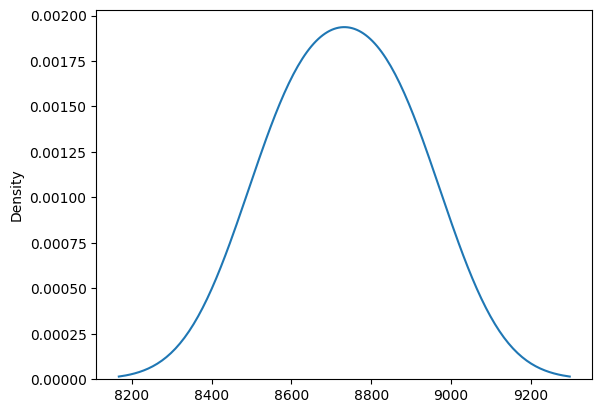

In [ ]:
# 95% CONFIDENCE INTERVAL FOR PURCHASE MADE BY MALES
import scipy.stats
mu_male = df4['Purchase'].mean()  # as the population mean is same as the sampling distribution sample mean
sigma1 = df4['Purchase'].std()
SEM1 = scipy.stats.sem(df4['Purchase'])  # to calculate standard error
confidence = 0.95
ci1 = scipy.stats.t.interval(confidence,len(df["Purchase"])-1,
                 loc=mu_male,
                 scale=SEM1)

   # for 95% ci
print("population mean :", mu_male)
print("population standard deviation :",sigma1)
print("population standard mean error :", SEM1)
print("95% confidence interval :", ci1)

sns.kdeplot(ci ,label = "females puchase" )
sns.kdeplot(ci1 , label = "males puchase")
# plt.legend()

FOR MARITAL STATUS

In [ ]:
data_unmarried = df.loc[df["Marital_Status"]== 0.0]

result1 = data_unmarried["Purchase"].mean()
print("Average of purchase by  unmarried customers :" ,result1)    # average of unmarried people purchase

data_married = df.loc[df["Marital_Status"]== 1.0]

result2 = data_married["Purchase"].mean()
print("Average of purchase by married customers :" ,result2)

Average of purchase by  unmarried customers : 9296.875827420825
Average of purchase bymarried customers : 9323.91943721281


All average values of samples for unmarried customers : [10588.49090909091, 8731.830188679245, 9292.05, 8780.245283018869, 9992.309090909092, 8860.526315789473, 8706.964912280702, 9777.745762711864, 9299.625, 8716.032786885246, 10189.525423728814, 9276.75, 9684.925925925925, 9173.267857142857, 9719.903846153846, 9480.77049180328, 9521.189655172413, 9483.377049180328, 9727.237288135593, 8919.964285714286, 8551.06779661017, 9339.566666666668, 10012.607843137255, 9723.875, 8946.046153846153, 8175.637931034483, 9496.22, 8120.80303030303, 9231.10606060606, 9083.425925925925, 9199.36507936508, 9116.819672131147, 10254.93220338983, 9535.75925925926, 9635.796610169491, 9604.440677966102, 9728.830508474577, 8792.627118644068, 8366.206896551725, 9283.061538461538, 9388.467741935483, 8519.564516129032, 8563.293103448275, 9377.810344827587, 9848.48275862069, 9600.4, 8933.35593220339, 9064.545454545454, 8979.8, 8934.017857142857, 9814.807017543859, 9360.05, 9191.67857142857, 8000.55737704918, 8880.

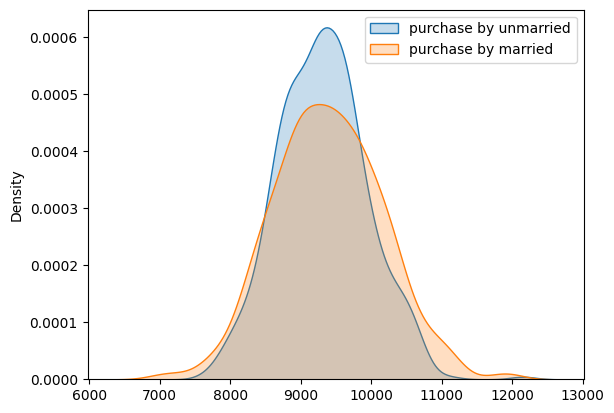

In [ ]:
l = []
for i in range(500):
    subset = df.sample(n=100)
    df1 = subset[subset["Marital_Status"]==0.0]  #for female customers
    mu1 = df1["Purchase"].mean()
    l.append(mu1)
print("All average values of samples for unmarried customers :",l)

l1 = []
for i in range(500):
    subset1 = df.sample(n=100)
    df2 = subset1[subset1["Marital_Status"]==1.0]
    mu2 = df2["Purchase"].mean()
    l1.append(mu2)
print("All average values of samples for married customers :",l1)
sns.kdeplot(l, label = "purchase by unmarried",fill = True)
sns.kdeplot(l1, label = "purchase by married", fill = True)
plt.legend()


In [ ]:
import scipy.stats
mu = data_unmarried['Purchase'].mean()
sigma = data_unmarried['Purchase'].std()
sem = scipy.stats.sem(data_unmarried['Purchase'])  # to calculate standard error
confidence = 0.95
ci = scipy.stats.t.interval(confidence, len(data_unmarried['Purchase'])-1, loc=mu, scale=sem)

   # for 95% ci
print("population mean of unmarried customers :", mu)
print()
print("population standard deviation of unmarried customers :",sigma)
print()
print("population standard mean error of unmarried customers :", sem)
print()
print("95% confidence intervalof unmarried customers:", ci)

import scipy.stats
mu2 = data_married['Purchase'].mean()
sigma1 = data_married['Purchase'].std()
sem1 = scipy.stats.sem(data_married['Purchase'])  # to calculate standard error
confidence = 0.95
ci1 = scipy.stats.t.interval(confidence, len(data_married['Purchase'])-1, loc=mu2, scale=sem1)

   # for 95% ci
print()
print("population mean of married customers :", mu2)
print()
print("population standard deviation of married customers:",sigma1)
print()
print("population standard mean error of married customers :", sem1)
print()
print("95% confidence interval of married customers :", ci1)
print()


population mean of unmarried customers : 9296.875827420825

population standard deviation of unmarried customers : 4983.362638214957

population standard mean error of unmarried customers : 15.687093236435372

95% confidence intervalof unmarried customers: (9266.129320884753, 9327.622333956897)

population mean of married customers : 9323.91943721281

population standard deviation of married customers: 4969.505415604629

population standard mean error of married customers : 18.74377786952204

95% confidence interval of married customers : (9287.181675063455, 9360.657199362164)



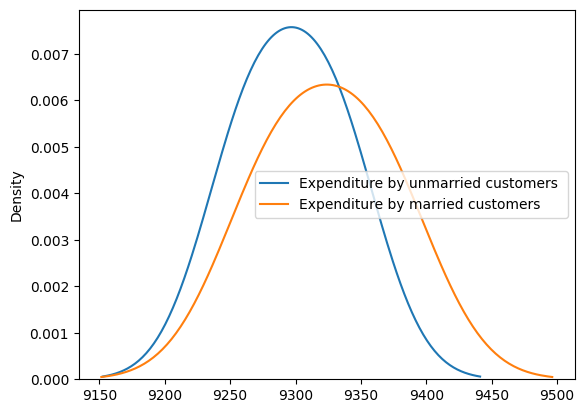

In [ ]:
sns.kdeplot(ci ,label = "Expenditure by unmarried customers ")
sns.kdeplot(ci1 , label = "Expenditure by married customers ")
plt.legend()


AGE VS PURCHASE ANALYSIS

In [ ]:
df[["Age","Purchase"]]
df_age = pd.DataFrame(df.groupby("Age")["Purchase"].mean().reset_index())  #average of each age group
df_age

,Age,Purchase
0,0-17,9035.305083
1,18-25,9229.520081
2,26-35,9306.880289
3,36-45,9406.056868
4,46-50,9276.711978
5,51-55,9625.425347
6,55+,9453.168915


In [ ]:
df["Age"].value_counts()

26-35    172608
36-45     86499
18-25     78780
46-50     35907
51-55     30300
55+       16825
0-17      11823
Name: Age, dtype: int64

To find sampling distribution mean

for age group 0-17 : [12169.0, 6733.0, 3997.0, 9082.0, 4647.0, 16452.333333333332, 7723.8, 9863.75, 8085.0, 12366.0, 12674.0, 6018.75, 8458.333333333334, 12435.5, 6228.5, 3359.0, 6487.666666666667, 15835.0, 6510.6, nan, nan, 16034.0, 13208.0, 3198.0, 5538.5, 8011.0, 1752.0, 8420.857142857143, 11469.0, 6635.5, 10392.333333333334, 6406.8, nan, 10438.75, 6580.0, 7340.0, 8679.0, 4603.0, 7681.5, 5022.0, 9345.5, 11137.75, 6657.5, 11814.4, 12810.0, 9474.2, 12804.5, 3537.0, 11999.333333333334, 9055.0, 10328.5, nan, 10560.333333333334, 10840.5, 9007.0, 12926.0, 10472.285714285714, 9851.333333333334, 8847.0, 10127.5, 7814.666666666667, 12056.25, 6523.8, 4902.0, 3475.6666666666665, nan, 11602.333333333334, nan, nan, 10154.6, 15451.0, 11129.666666666666, 11932.0, 10376.0, 9274.0, 7911.0, 6960.0, 5861.0, 11618.5, 13325.333333333334, 9950.0, 14425.333333333334, 5965.0, 6424.8, 10638.0, 6486.666666666667, 5093.0, 5191.0, 4503.0, 10369.2, 8569.0, 7613.25, 13655.0, 5557.0, 5473.333333333333, 8931.5, 62

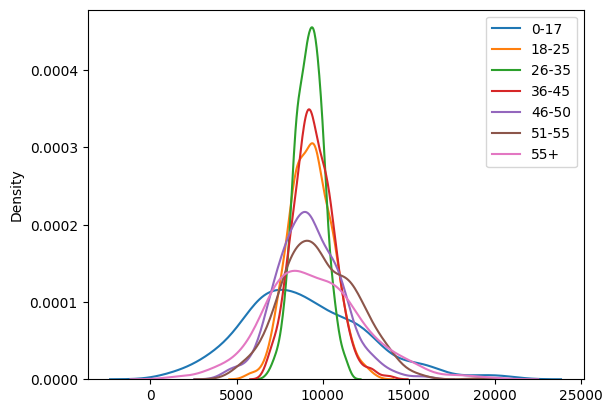

In [ ]:
l = []
for i in range(500):
    subset = df.sample(n=100)
    df1 = subset[subset["Age"]=="0-17"]
    mu1 = df1["Purchase"].mean()
    l.append(mu1)
print("for age group 0-17 :",l)

l1 = []
for i in range(500):
    subset1 = df.sample(n=100)
    df2 = subset1[subset1["Age"]=="18-25"]
    mu2 = df2["Purchase"].mean()
    l1.append(mu2)
print("for age group18-25 :",l1)

l2 = []
for i in range(500):
    subset2 = df.sample(n=100)
    df3 = subset2[subset2["Age"]=="26-35"]
    mu3 = df3["Purchase"].mean()
    l2.append(mu3)
print("for age group 26-35 :",l2)


l3 = []
for i in range(500):
    subset3 = df.sample(n=100)
    df4 = subset3[subset3["Age"]=="36-45"]
    mu4 = df4["Purchase"].mean()
    l3.append(mu4)
print("for age group 36-45  :",l3)


l4 = []
for i in range(500):
    subset4 = df.sample(n=100)
    df5 = subset4[subset4["Age"]=="46-50"]
    mu5 = df5["Purchase"].mean()
    l4.append(mu5)
print("for age group 46-50  :",l4)


l5 = []
for i in range(500):
    subset5 = df.sample(n=100)
    df6 = subset5[subset5["Age"]=="51-55"]
    mu6 = df6["Purchase"].mean()
    l5.append(mu6)
print("for age group 51-55 :",l5)


l6 = []
for i in range(500):
    subset6 = df.sample(n=100)
    df7 = subset6[subset6["Age"]=="55+"]
    mu7 = df7["Purchase"].mean()
    l6.append(mu7)
print("for age group 55+  :",l6)



sns.kdeplot(l, label = "0-17")
sns.kdeplot(l1, label ="18-25")
sns.kdeplot(l2, label ="26-35")
sns.kdeplot(l3, label ="36-45")
sns.kdeplot(l4, label ="46-50")
sns.kdeplot(l5, label ="51-55")
sns.kdeplot(l6, label ="55+")
plt.legend()

In [ ]:
df_Age1 = df[df["Age"]=="0-17"]
df_Age2 = df[df["Age"]=="18-25"]
df_Age3 = df[df["Age"]=="26-35"]
df_Age4 = df[df["Age"]=="36-45"]
df_Age5 = df[df["Age"]=="46-50"]
df_Age6 = df[df["Age"]=="51-55"]
df_Age7 = df[df["Age"]=="55+"]

TO FIND CONFIDENCE INTERVAL

In [ ]:
import scipy.stats
mu = 9035.305083
sigma = df_Age1["Purchase"].std()
sem = scipy.stats.sem(df_Age1["Purchase"])  # to calculate standard error
confidence = 0.95
ci = scipy.stats.t.interval(confidence, len(df_Age1["Purchase"])-1, loc=mu, scale=sem)
print("confidence interval of 0-17 :", ci)

confidence interval of 0-17 : (8943.721398830374, 9126.888767169625)


In [ ]:
import scipy.stats
mu = 9229.520081
sigma = df_Age2["Purchase"].std()
sem = scipy.stats.sem(df_Age2["Purchase"])  # to calculate standard error
confidence = 0.95
ci1 = scipy.stats.t.interval(confidence, len(df_Age2["Purchase"])-1, loc=mu, scale=sem)
print("confidence interval of 18-25 :", ci1)

confidence interval of 18-25 : (9194.634958570758, 9264.405203429244)


In [ ]:
import scipy.stats
mu = 9306.880289
sigma = df_Age3["Purchase"].std()
sem = scipy.stats.sem(df_Age3["Purchase"])  # to calculate standard error
confidence = 0.95
ci2 = scipy.stats.t.interval(confidence, len(df_Age3["Purchase"])-1, loc=mu, scale=sem)
print("confidence interval of 26-35 :", ci2)

confidence interval of 26-35 : (nan, nan)


In [ ]:
import scipy.stats
mu = 9406.056868
sigma = df_Age4["Purchase"].std()
sem = scipy.stats.sem(df_Age4["Purchase"])  # to calculate standard error
confidence = 0.95
ci3 = scipy.stats.t.interval(confidence, len(df_Age4["Purchase"])-1, loc=mu, scale=sem)
print("confidence interval of 36-45 :", ci3)

confidence interval of 36-45 : (9372.878668309933, 9439.235067690066)


In [ ]:
import scipy.stats
mu = 9276.711978
sigma = df_Age5["Purchase"].std()
sem = scipy.stats.sem(df_Age4["Purchase"])  # to calculate standard error
confidence = 0.95
ci4 = scipy.stats.t.interval(confidence, len(df_Age5["Purchase"])-1, loc=mu, scale=sem)
print("confidence interval of 46-50 :", ci4)

confidence interval of 46-50 : (9243.533124137693, 9309.890831862305)


In [ ]:
import scipy.stats
mu = 9625.425347
sigma = df_Age6["Purchase"].std()
sem = scipy.stats.sem(df_Age4["Purchase"])  # to calculate standard error
confidence = 0.95
ci5 = scipy.stats.t.interval(confidence, len(df_Age6["Purchase"])-1, loc=mu, scale=sem)
print("confidence interval of 51-55 :", ci5)

confidence interval of 51-55 : (9592.24628615708, 9658.60440784292)


In [ ]:
import scipy.stats
mu = 9453.168915
sigma = df_Age7["Purchase"].std()
sem = scipy.stats.sem(df_Age4["Purchase"])  # to calculate standard error
confidence = 0.95
ci6 = scipy.stats.t.interval(confidence, len(df_Age7["Purchase"])-1, loc=mu, scale=sem)
print("confidence interval of 55+ :", ci6)

confidence interval of 55+ : (9419.988792505581, 9486.34903749442)


<ipython-input-41-95ddda710dbe>:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data  = ci2,label = "26-35")


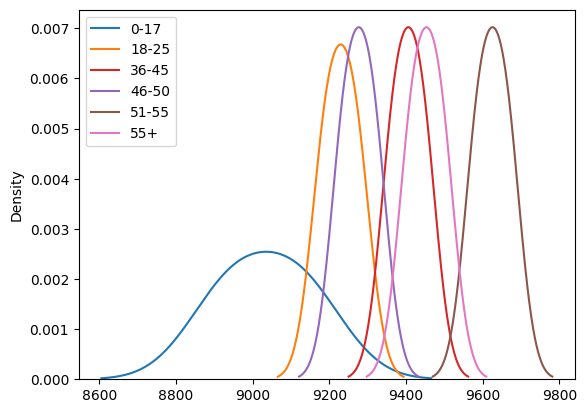

In [ ]:
sns.kdeplot(data  = ci ,label = "0-17")
sns.kdeplot(data  = ci1,label = "18-25")
sns.kdeplot(data  = ci2,label = "26-35")
sns.kdeplot(data  = ci3,label = "36-45")
sns.kdeplot(data  = ci4,label = "46-50")
sns.kdeplot(data  = ci5,label = "51-55")
sns.kdeplot(data  = ci6,label = "55+")
plt.legend()
